1.  dur: duration of agreement 
       [1..7]
   2.   wage1.wage : wage increase in first year of contract 
       [2.0 .. 7.0]
   3.   wage2.wage : wage increase in second year of contract
       [2.0 .. 7.0]
   4.   wage3.wage : wage increase in third year of contract
       [2.0 .. 7.0]
   5.   cola : cost of living allowance 
       [none, tcf, tc]
   6.   hours.hrs : number of working hours during week
       [35 .. 40]
   7.   pension : employer contributions to pension plan
       [none, ret_allw, empl_contr]
   8.   stby_pay : standby pay
       [2 .. 25]
   9.   shift_diff : shift differencial : supplement for work on II and III shift
       [1 .. 25]
  10.   educ_allw.boolean : education allowance 
       [true false]
  11.   holidays : number of statutory holidays 
       [9 .. 15]
  12.   vacation : number of paid vacation days
       [ba, avg, gnr]
  13.   lngtrm_disabil.boolean : 
       employer's help during employee longterm disabil
       ity [true , false]
  14.   dntl_ins : employers contribution towards the dental plan
       [none, half, full]
  15.   bereavement.boolean : employer's financial contribution towards the 
       covering the costs of bereavement
       [true , false]
  16.   empl_hplan : employer's contribution towards the health plan
       [none, half, full]

In [404]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

In [405]:
col = ["dur", "wage1.wage", "wage2.wage", "wage3.wage", "cola", "hours.hrs", "pension", "stby_pay", "shift_diff", "educ_allw.boolean", "holidays", "vacation", "lngtrm_disabil.boolean", "dntl_ins", "bereavement.boolean", "empl_hplan"]
df = pd.read_csv("labor-neg.data", names=col, index_col=False)
df

,dur,wage1.wage,wage2.wage,wage3.wage,cola,hours.hrs,pension,stby_pay,shift_diff,educ_allw.boolean,holidays,vacation,lngtrm_disabil.boolean,dntl_ins,bereavement.boolean,empl_hplan
0,1,5.0,?,?,?,40,?,?,2,?,11,average,?,?,yes,?
1,2,4.5,5.8,?,?,35,ret_allw,?,?,yes,11,below average,?,full,?,full
2,?,?,?,?,?,38,empl_contr,?,5,?,11,generous,yes,half,yes,half
3,3,3.7,4.0,5.0,tc,?,?,?,?,yes,?,?,?,?,yes,?
4,3,4.5,4.5,5.0,?,40,?,?,?,?,12,average,?,half,yes,half
5,2,2.0,2.5,?,?,35,?,?,6,yes,12,average,?,?,?,?
6,3,4.0,5.0,5.0,tc,?,empl_contr,?,?,?,12,generous,yes,none,yes,half
7,3,6.9,4.8,2.3,?,40,?,?,3,?,12,below average,?,?,?,?
8,2,3.0,7.0,?,?,38,?,12,25,yes,11,below average,yes,half,yes,?
9,1,5.7,?,?,none,40,empl_contr,?,4,?,11,generous,yes,full,?,?


In [406]:
for col in df:
    print(col, df[col].unique())

dur ['1' '2' '?' '3']
wage1.wage ['5.0' '4.5' '?' '3.7' '2.0' '4.0' '6.9' '3.0' '5.7' '3.5' '6.4' '2.8'
 '2.1' '4.3' '2.5' '6.0']
wage2.wage ['?' '5.8' '4.0' '4.5' '2.5' '5.0' '4.8' '7.0' '6.4' '4.4' '3.0' '2.0']
wage3.wage ['?' '5.0' '2.3' '4.6' '5.1' '2.0' '2.5' '2.1']
cola ['?' 'tc' 'none' 'tcf']
hours.hrs ['40' '35' '38' '?' '36' '37' '27' '33']
pension ['?' 'ret_allw' 'empl_contr' 'none']
stby_pay ['?' '12' '2' '13' '8' '4']
shift_diff ['2' '?' '5' '6' '3' '25' '4' '10' '1' '0']
educ_allw.boolean ['?' 'yes' 'no']
holidays ['11' '?' '12' '13' '15' '10' '9']
vacation ['average' 'below average' 'generous' '?']
lngtrm_disabil.boolean ['?' 'yes' 'no']
dntl_ins ['?' 'full' 'half' 'none']
bereavement.boolean ['yes' '?' 'no']
empl_hplan ['?' 'full' 'half' 'none']


## **Drop Rows that has ? duration**

In [407]:
df = df[df["dur"] != "?"]
df = df.reset_index(drop=True)

## **Imputation**



We are going to replace the "?" with "none" if the description state that "none" is a valid value



In [408]:
def replace_with_none(columns):
    for column in columns:
        df[column].replace("?", "none", inplace=True)

def replace_with_value(columns):
    for (column, value) in columns:
       df[column].replace("?", value, inplace=True)

def replace_boolean_value():
    df.replace("yes", 1, inplace=True)
    df.replace("no", 0, inplace=True)

col_to_replace_val = [
    ("wage1.wage", 2),
    ("wage2.wage", 0),
    ("wage3.wage", 0),
    ("hours.hrs", 35),
    ("stby_pay", 2),
    ("shift_diff", 1),
    ("educ_allw.boolean", 0),
    ("holidays", 9),
    ("vacation", "ba"),
    ("lngtrm_disabil.boolean", 0),
    ("bereavement.boolean", 0)
]

replace_with_value(col_to_replace_val)
replace_boolean_value()
replace_with_none(["cola", "pension", "dntl_ins", "empl_hplan"])

## **One-Hot Encoding**

In [409]:
def one_hot_encode(column):
    one_hot_res = pd.get_dummies(df[column], prefix=column)
    one_hot_res.reset_index(drop=True)
    df.drop([column], axis=1, inplace=True)
    return one_hot_res

def discretization_to_one_hot_encode(column, cut, label, type):
    dis_res = df[column].astype(type)
    new_cut = pd.cut(dis_res, cut, labels=label)
    new_df = pd.DataFrame(new_cut, columns=[column])
    one_hot_res = pd.get_dummies(new_df, prefix=column)
    one_hot_res.reset_index(drop=True)
    df.drop([column], axis=1,inplace=True)
    return one_hot_res

vac = one_hot_encode("vacation")
pen = one_hot_encode("pension")
dntl = one_hot_encode("dntl_ins")
cola = one_hot_encode("cola")
dur = one_hot_encode("dur")
empl_hplan = one_hot_encode("empl_hplan")

wage1 = discretization_to_one_hot_encode("wage1.wage", 2, ["average", "great"], float)
wage2 = discretization_to_one_hot_encode("wage2.wage", 2, ["average", "great"], float)
wage3 = discretization_to_one_hot_encode("wage3.wage", 2, ["average", "great"], float)
hours = discretization_to_one_hot_encode("hours.hrs", 2, ["normal", "overtime"], int)
stby_pay = discretization_to_one_hot_encode("stby_pay", 2, ["normal", "great"], int)
shift_diff = discretization_to_one_hot_encode("shift_diff", 2, ["small", "large"], int)
holidays = discretization_to_one_hot_encode("holidays", 3, ["short", "average", "long"], int)

In [410]:
df = df.join([wage1, wage2, wage3, hours, stby_pay, shift_diff, empl_hplan, holidays, dur, cola, vac, pen, dntl])

In [411]:
df = df.astype(bool)
df.head()

,educ_allw.boolean,lngtrm_disabil.boolean,bereavement.boolean,wage1.wage_average,wage1.wage_great,wage2.wage_average,wage2.wage_great,wage3.wage_average,wage3.wage_great,hours.hrs_normal,...,vacation_average,vacation_ba,vacation_below average,vacation_generous,pension_empl_contr,pension_none,pension_ret_allw,dntl_ins_full,dntl_ins_half,dntl_ins_none
0,False,False,True,False,True,True,False,True,False,False,...,True,False,False,False,False,True,False,False,False,True
1,True,False,False,False,True,False,True,True,False,False,...,False,False,True,False,False,False,True,True,False,False
2,True,False,True,True,False,False,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,False,False,True,False,True,False,True,False,True,False,...,True,False,False,False,False,True,False,False,True,False
4,True,False,False,True,False,True,False,True,False,False,...,True,False,False,False,False,True,False,False,False,True


In [412]:
frequent_item = fpgrowth(df, min_support=0.6, use_colnames=True)


In [417]:
frequent_item.head()

,support,itemsets
0,0.974359,(shift_diff_small)
1,0.948718,(hours.hrs_overtime)
2,0.923077,(stby_pay_normal)
3,0.820513,(wage3.wage_average)
4,0.769231,(pension_none)


In [414]:
assoc_rule = association_rules(frequent_item)


In [415]:
assoc_rule.tail(40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
100,"(cola_none, wage3.wage_average)","(hours.hrs_overtime, shift_diff_small)",0.666667,0.923077,0.615385,0.923077,1.000000,0.000000,1.000000
101,(cola_none),"(hours.hrs_overtime, shift_diff_small, wage3.w...",0.743590,0.769231,0.615385,0.827586,1.075862,0.043393,1.338462
102,"(cola_none, shift_diff_small, stby_pay_normal)",(wage3.wage_average),0.692308,0.820513,0.615385,0.888889,1.083333,0.047337,1.615385
103,"(cola_none, shift_diff_small, wage3.wage_average)",(stby_pay_normal),0.641026,0.923077,0.615385,0.960000,1.040000,0.023669,1.923077
104,"(cola_none, stby_pay_normal, wage3.wage_average)",(shift_diff_small),0.615385,0.974359,0.615385,1.000000,1.026316,0.015779,inf
105,"(shift_diff_small, stby_pay_normal, wage3.wage...",(cola_none),0.743590,0.743590,0.615385,0.827586,1.112961,0.062459,1.487179
106,"(cola_none, shift_diff_small)","(stby_pay_normal, wage3.wage_average)",0.717949,0.743590,0.615385,0.857143,1.152709,0.081525,1.794872
107,"(cola_none, stby_pay_normal)","(shift_diff_small, wage3.wage_average)",0.692308,0.794872,0.615385,0.888889,1.118280,0.065089,1.846154
108,"(cola_none, wage3.wage_average)","(shift_diff_small, stby_pay_normal)",0.666667,0.923077,0.615385,0.923077,1.000000,0.000000,1.000000
109,"(stby_pay_normal, wage3.wage_average)","(cola_none, shift_diff_small)",0.743590,0.717949,0.615385,0.827586,1.152709,0.081525,1.635897


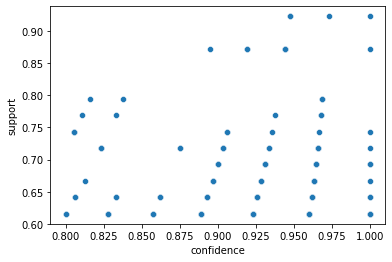

In [416]:
sns.scatterplot(y=assoc_rule["support"], x=assoc_rule["confidence"])
plt.show()